# Домашняя работа

### Что делать

Построить 5 графиков по выбранным данным.

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек.

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

### Откуда брать данные

Можно взять свой датасет или воспользоваться одним из приведенных ниже:

Данные IMDB (https://www.kaggle.com/tmdb/tmdb-movie-metadata)
Данные NYC (https://www.kaggle.com/c/nyc-taxi-trip-duration)
Данные NBA (https://www.kaggle.com/drgilermo/nba-players-stats)

## ==========
Использую собственный дата-сет (Data_19052020_zakupki.gov.ru.txt). Это краткая открытая информация по закупкам, осуществленным рядом "государственных" организаторов закупок в 2017-2018 года (получена с сайта zakupki.gov.ru).

### Импорт библиотек и подготовка DataFrame для всех графиков

In [1]:
"""Импорт библиотек"""

import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.dpi'] = 200 # Более четкая отрисовка

In [2]:
"""Чтение данных"""

data = pd.read_csv('Data_19052020_zakupki.gov.ru.txt', sep='\t')

In [3]:
data.head(4)

,ID,Year,Organizer,Purchase number,Purchasing method,Lot number,Price (rub),OKPD2
0,ID00001,2017,ИНТЕРРАО-ЦУЗ (ООО),31704644902,Единственный поставщик,1,"6 744 552,61","62.02 Услуги консультативные, связанные с комп..."
1,ID00002,2017,ИНТЕРРАО-ЦУЗ (ООО),31704645094,Единственный поставщик,1,"750 000,00",85.31 Услуги по профессиональному обучению
2,ID00003,2017,ИНТЕРРАО-ЦУЗ (ООО),31704645558,Единственный поставщик,1,"2 000 000,00",85.41 Услуги по дополнительному образованию де...
3,ID00004,2017,ИНТЕРРАО-ЦУЗ (ООО),31704645808,Единственный поставщик,1,"12 293 600,00",52.24 Услуги по обработке грузов


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46723 entries, 0 to 46722
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 46723 non-null  object
 1   Year               46723 non-null  int64 
 2   Organizer          46723 non-null  object
 3   Purchase number    46723 non-null  int64 
 4   Purchasing method  46723 non-null  object
 5   Lot number         46723 non-null  int64 
 6   Price (rub)        46723 non-null  object
 7   OKPD2              46723 non-null  object
dtypes: int64(3), object(5)
memory usage: 2.9+ MB


In [5]:
"""Подготовка даннных для последующего анализа"""

data['Price (rub)'] = data['Price (rub)'].str.replace(',','.')
data['Price (rub)'] = data['Price (rub)'].str.replace(' ','')
data['Purchase number'] = data['Purchase number'].astype('object')
data['Price (rub)'] = data['Price (rub)'].astype('float64')

In [6]:
data.head(4)

,ID,Year,Organizer,Purchase number,Purchasing method,Lot number,Price (rub),OKPD2
0,ID00001,2017,ИНТЕРРАО-ЦУЗ (ООО),31704644902,Единственный поставщик,1,6744552.61,"62.02 Услуги консультативные, связанные с комп..."
1,ID00002,2017,ИНТЕРРАО-ЦУЗ (ООО),31704645094,Единственный поставщик,1,750000.00,85.31 Услуги по профессиональному обучению
2,ID00003,2017,ИНТЕРРАО-ЦУЗ (ООО),31704645558,Единственный поставщик,1,2000000.00,85.41 Услуги по дополнительному образованию де...
3,ID00004,2017,ИНТЕРРАО-ЦУЗ (ООО),31704645808,Единственный поставщик,1,12293600.00,52.24 Услуги по обработке грузов


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46723 entries, 0 to 46722
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 46723 non-null  object 
 1   Year               46723 non-null  int64  
 2   Organizer          46723 non-null  object 
 3   Purchase number    46723 non-null  object 
 4   Purchasing method  46723 non-null  object 
 5   Lot number         46723 non-null  int64  
 6   Price (rub)        46723 non-null  float64
 7   OKPD2              46723 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 2.9+ MB


### График 1

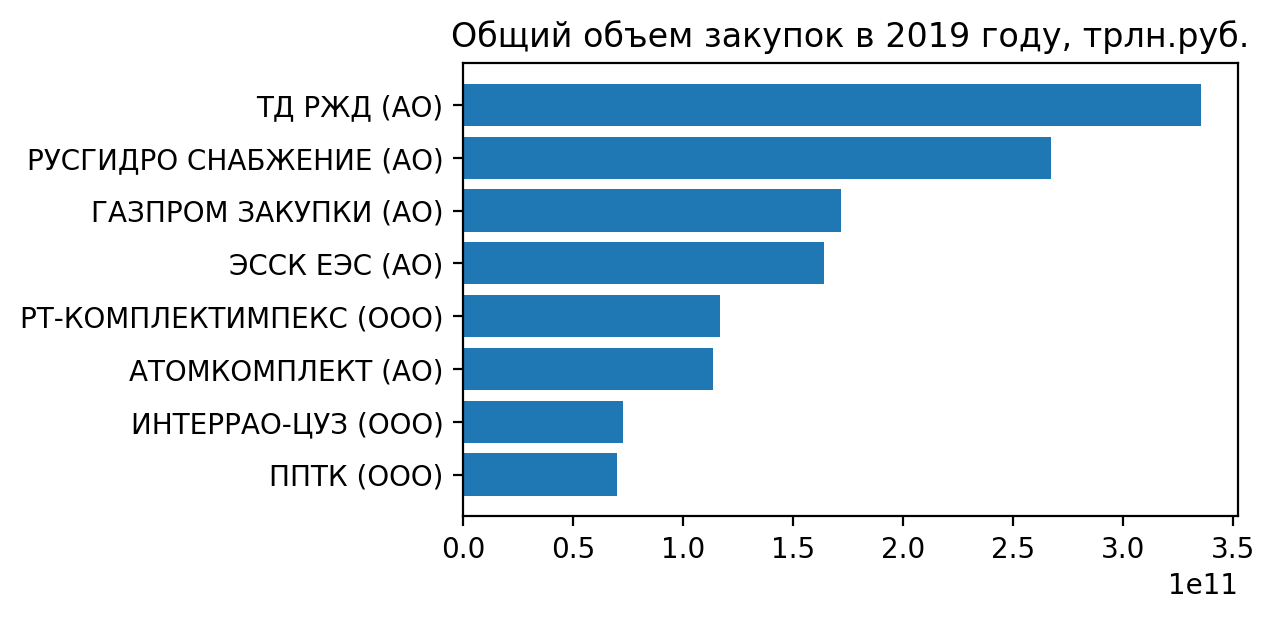

In [8]:
rcParams['figure.figsize'] = 5,3 # График крупней

graf_01 = data.query('Year == 2019')
graf_01 = graf_01[['Organizer', 'Price (rub)']].groupby('Organizer').sum().reset_index()
graf_01.sort_values('Price (rub)', inplace=True)

plt.barh(graf_01['Organizer'], graf_01['Price (rub)'])

plt.title('Общий объем закупок в 2019 году, трлн.руб.') 
#Не хочу в триллионах рублях, хочу чтобы на шкале X было не "3.5 трлн.руб.", а "350 млрд.руб.", как?

plt.show()

In [9]:
graf_01.sort_values(by='Price (rub)', ascending=False)

,Organizer,Price (rub)
6,ТД РЖД (АО),3.355318e+11
5,РУСГИДРО СНАБЖЕНИЕ (АО),2.673571e+11
1,ГАЗПРОМ ЗАКУПКИ (АО),1.718908e+11
7,ЭССК ЕЭС (АО),1.640916e+11
4,РТ-КОМПЛЕКТИМПЕКС (ООО),1.169671e+11
0,АТОМКОМПЛЕКТ (АО),1.135808e+11
2,ИНТЕРРАО-ЦУЗ (ООО),7.259768e+10
3,ППТК (ООО),6.992751e+10


### График 2

/Users/vladimirscherbakov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  if __name__ == '__main__':
/Users/vladimirscherbakov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


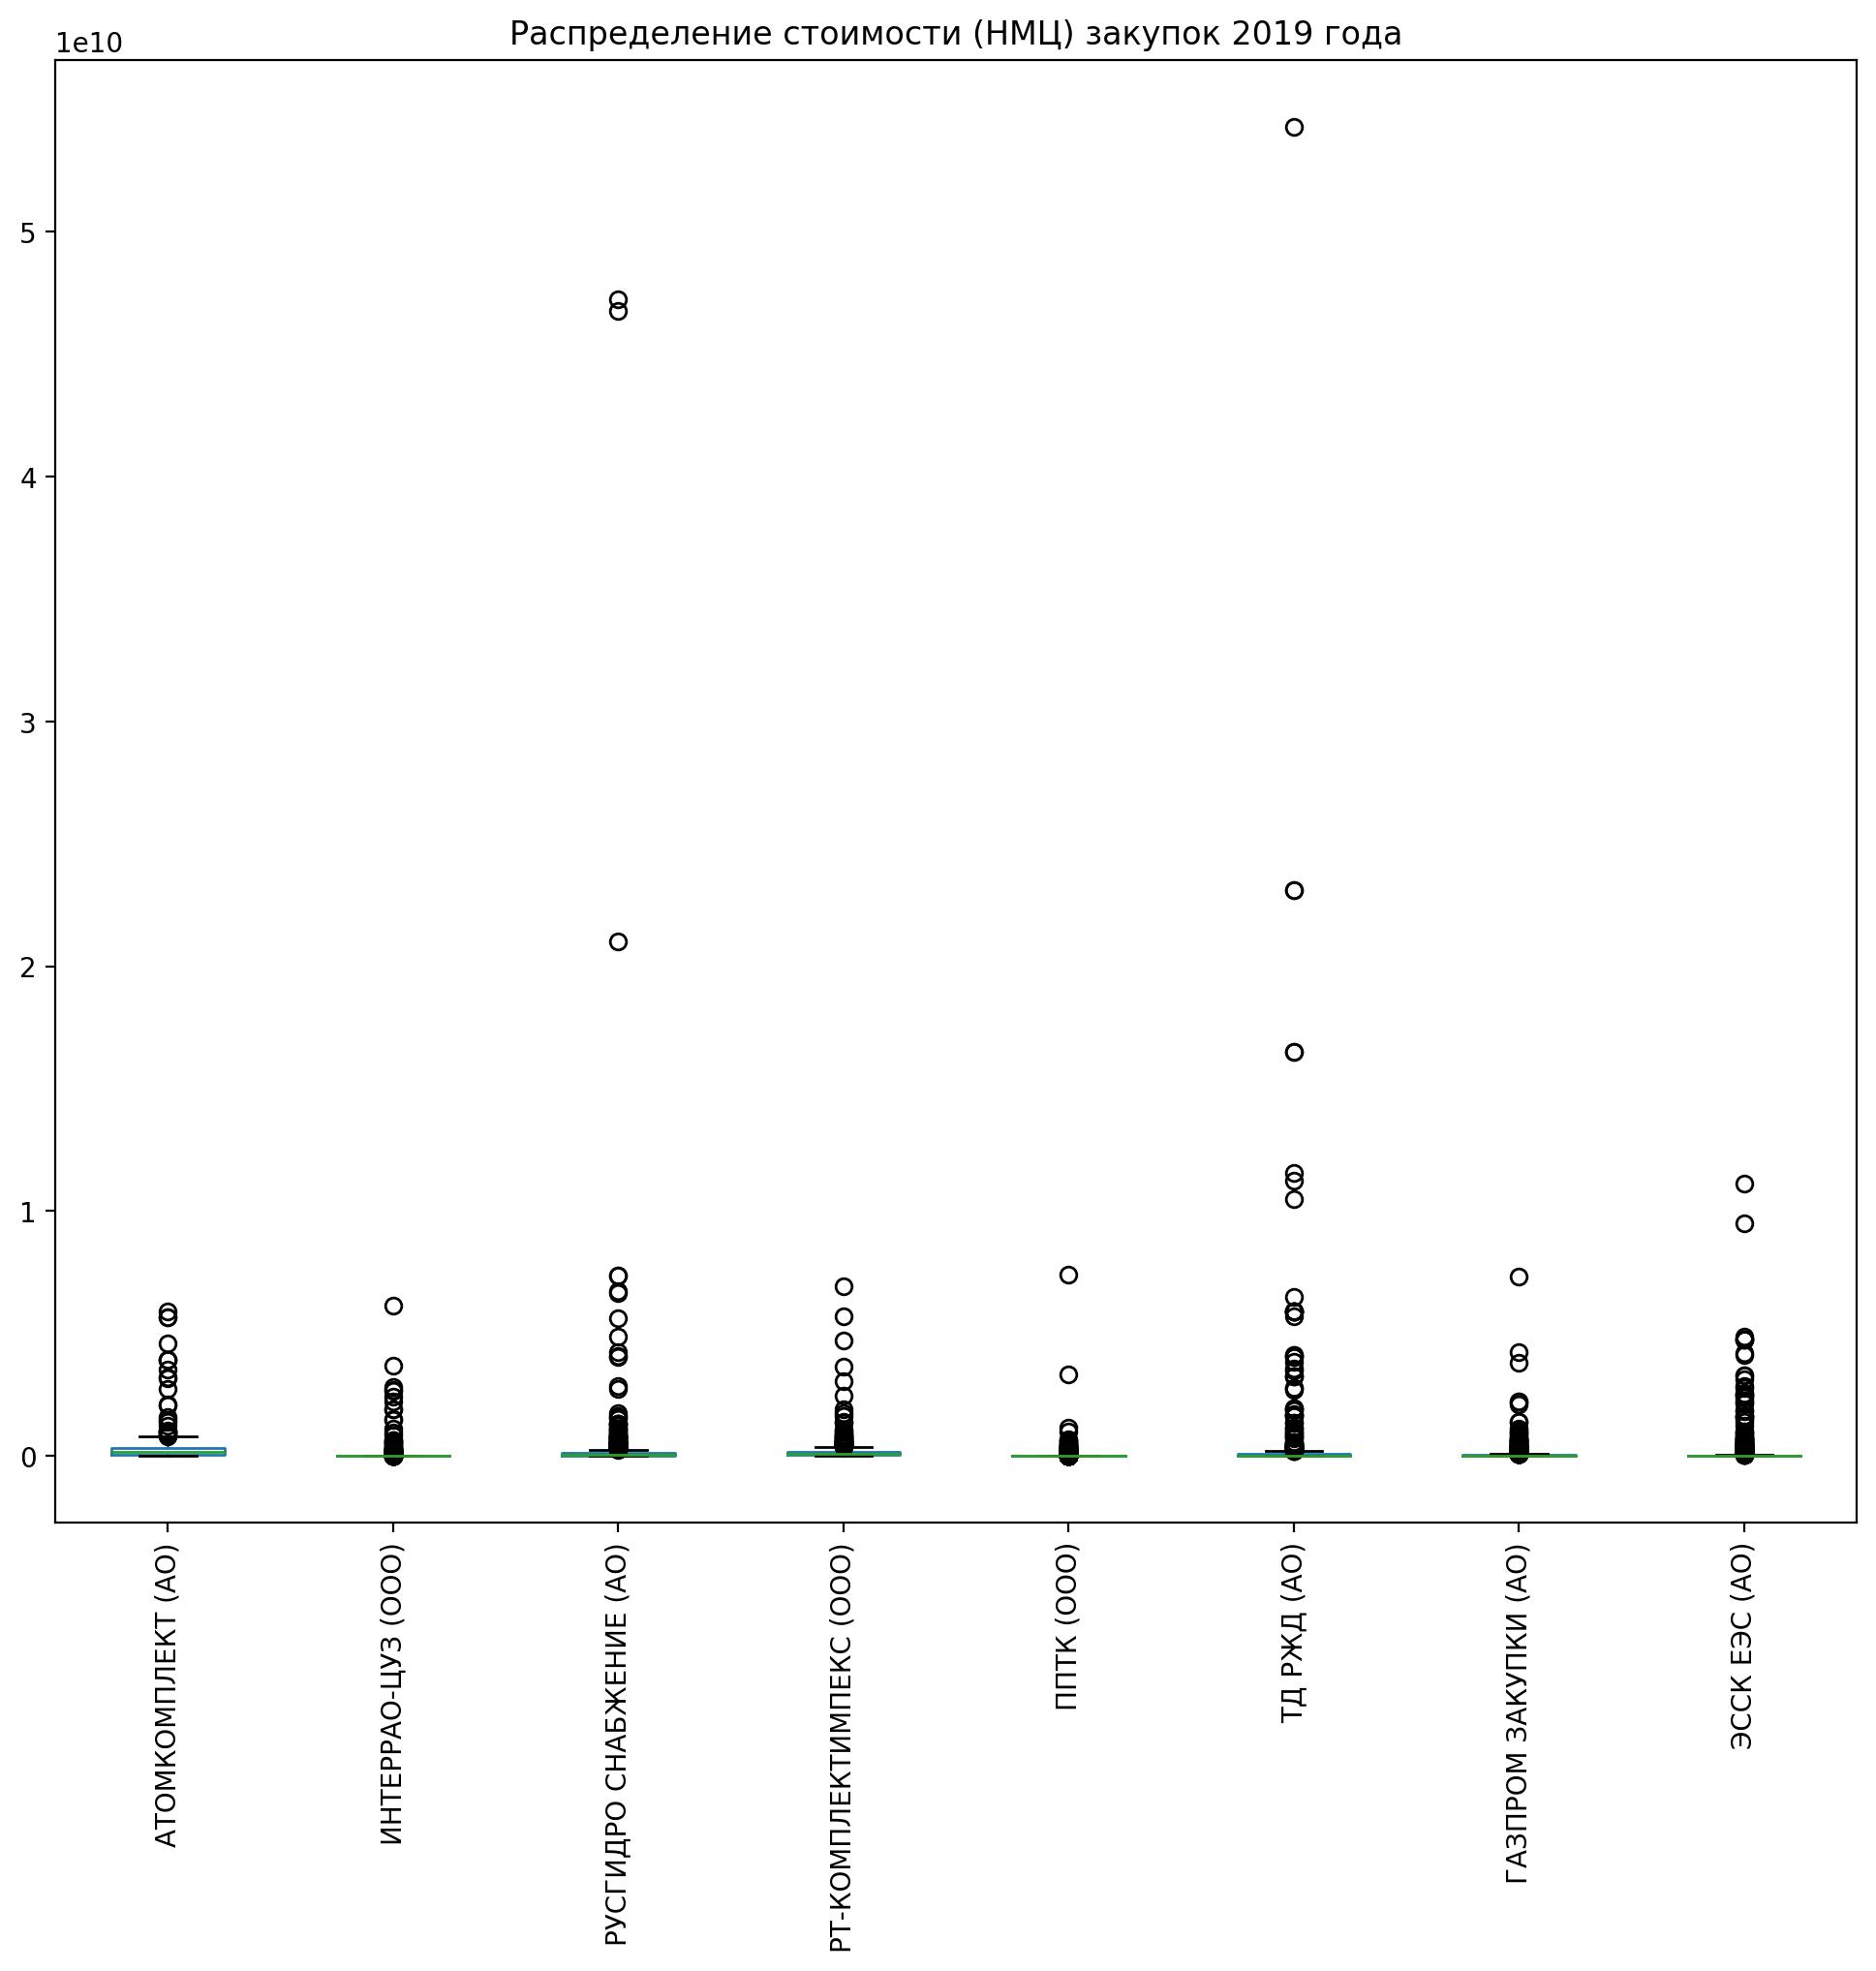

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,10 # График крупней

graf_02 = data.query('Year == 2019')
graf_02 = graf_02[['Organizer', 'Price (rub)']]

#--- Понимаю, что через циклы это медленно; есть ощущение, что можно проще, но я не понял как (через pivot_table не получилось, как и через apply())
for org_names in graf_02['Organizer'].drop_duplicates().values:
    graf_02[org_names] = pd.np.nan # Создаю столбец на каждого организатора закупок и заполняю их пустыми значениями

for i, el in enumerate(graf_02['Organizer']):
    if el == graf_02.Organizer[i:i+1].values[0]:
        graf_02[el][i:i+1] = graf_02['Price (rub)'][i:i+1].values[0] # Переношу стоимость закупки в столбец соответствующего организатора
        
graf_02 = graf_02.drop(['Organizer', 'Price (rub)'], axis=1) # Удаляю уже не нужные столбцы
#---

graf_02.plot.box()

plt.title('Распределение стоимости (НМЦ) закупок 2019 года')
plt.xticks(rotation=90)

plt.show()

### График 3

In [11]:
rcParams['figure.figsize'] = 5,3

graf_03 = data.query('Year == 2019')
graf_03['Count'] = 1 # Не знаю как посчитать текстовые строки, поэтому ввожу столбец, как счетчик

graf_03 = (graf_03[['Organizer', 'OKPD2', 'Count']].
           groupby(['Organizer', 'OKPD2']).agg('count').
           sort_values(by='Count', ascending=False).reset_index() # Не понял можно ли как-то начать отсчет индекса с 1, а не с нуля
          )[0:10]

graf_03.style.bar(color='#2678b2')

/Users/vladimirscherbakov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Organizer,OKPD2,Count
0,ППТК (ООО),"71.20 Услуги в области технических испытаний, исследований, анализа и сертификации",497
1,ЭССК ЕЭС (АО),71.12 Услуги в области инженерно-технического проектирования и связанные технические консультативные услуги,439
2,ЭССК ЕЭС (АО),42.22 Сооружения и строительные работы по строительству коммунальных объектов для электроснабжения и связи,348
3,ППТК (ООО),71.12 Услуги в области инженерно-технического проектирования и связанные технические консультативные услуги,288
4,ИНТЕРРАО-ЦУЗ (ООО),33.12 Услуги по ремонту оборудования,275
5,ГАЗПРОМ ЗАКУПКИ (АО),71.12 Услуги в области инженерно-технического проектирования и связанные технические консультативные услуги,261
6,ГАЗПРОМ ЗАКУПКИ (АО),"26.51 Оборудование для измерения, испытаний и навигации",251
7,ППТК (ООО),33.12 Услуги по ремонту оборудования,250
8,ТД РЖД (АО),30.20 Локомотивы железнодорожные и подвижной состав,157
9,ИНТЕРРАО-ЦУЗ (ООО),"26.51 Оборудование для измерения, испытаний и навигации",153


### График 4

/Users/vladimirscherbakov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


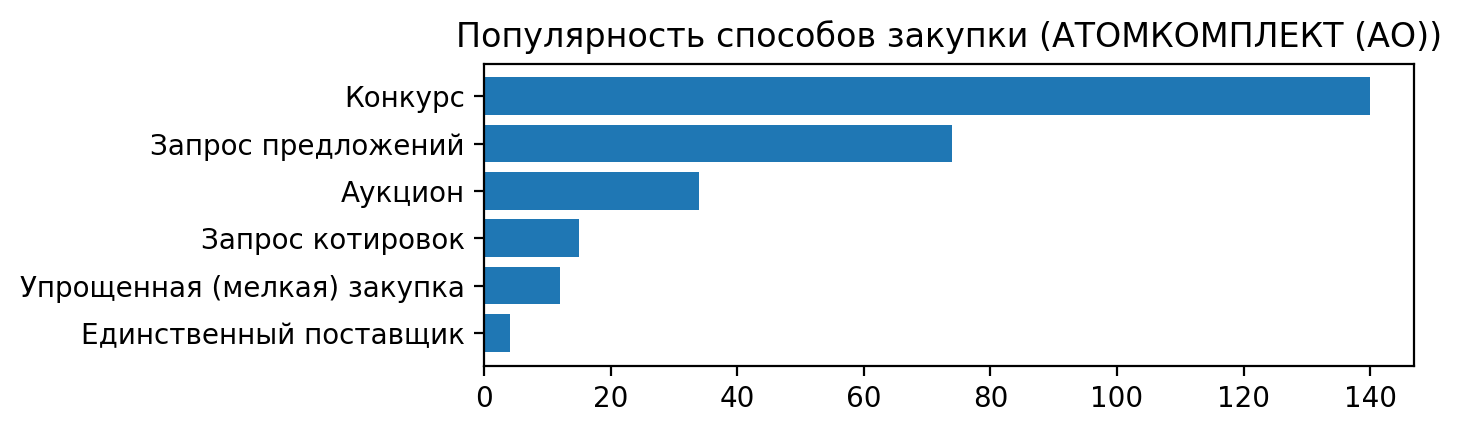

In [12]:
rcParams['figure.figsize'] = 6,2

graf_04 = data.query('Year == 2019 and Organizer == "АТОМКОМПЛЕКТ (АО)"')
graf_04['Count'] = 1
graf_04 = graf_04[['Purchasing method', 'Count']]
graf_04 = graf_04.groupby('Purchasing method').agg('count').sort_values(by='Count', ascending=False).reset_index()

plt.barh(graf_04['Purchasing method'][::-1], graf_04['Count'][::-1]) #Не знаю как по нормальному сделать порядок отображения от большего к меньшому (в задачи 1 оно сомо отсортировалось)

plt.title('Популярность способов закупки (АТОМКОМПЛЕКТ (АО))')

plt.show()

### График 5

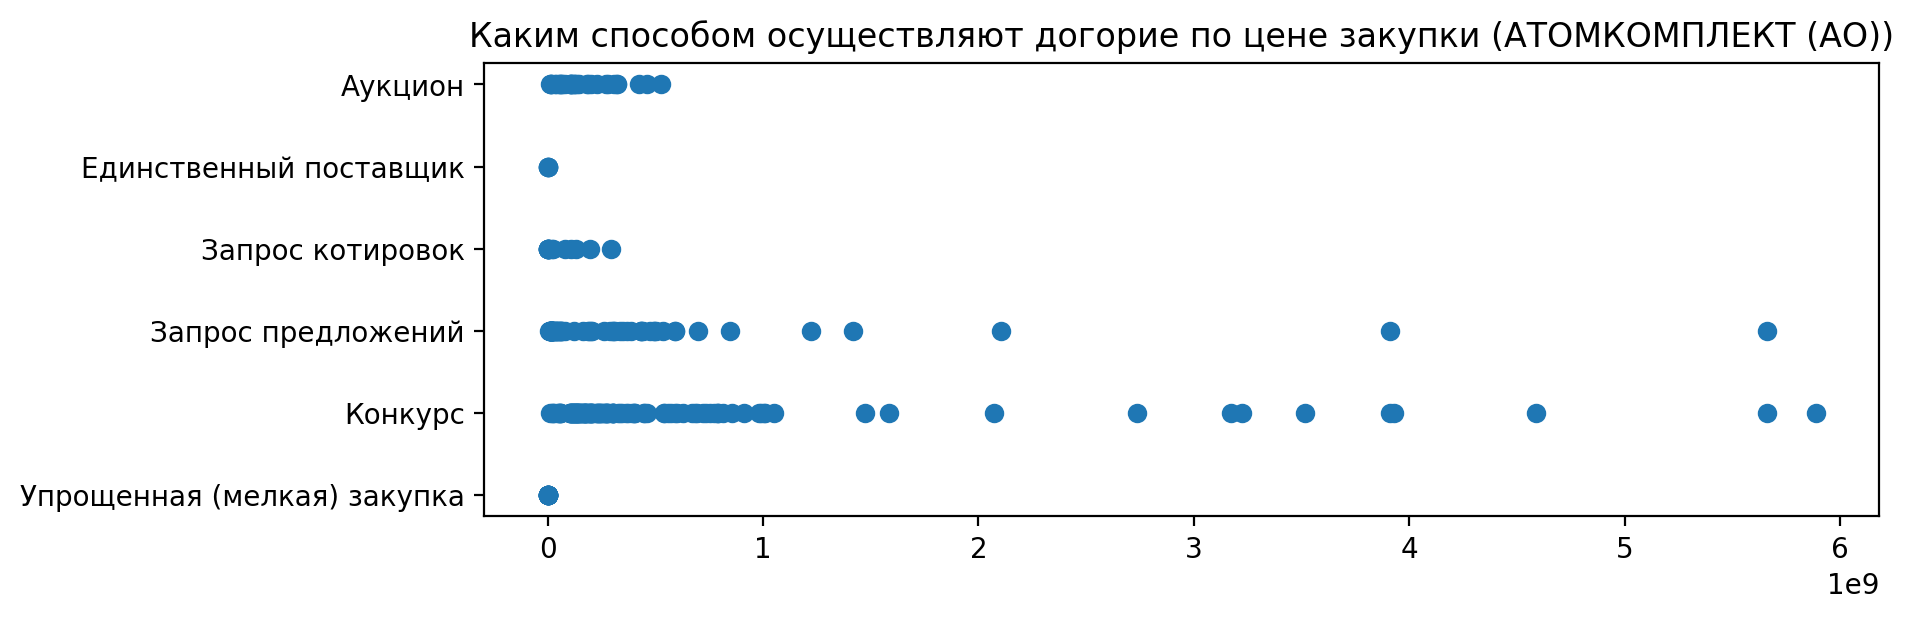

In [13]:
rcParams['figure.figsize'] = 9,3

graf_05 = data.query('Year == 2019 and Organizer == "АТОМКОМПЛЕКТ (АО)"')

graf_05 = graf_05[['Purchasing method', 'Price (rub)']].reset_index()
graf_05 = graf_05.drop(['index'], axis=1)

plt.scatter(graf_05['Price (rub)'], graf_05['Purchasing method'])

plt.title('Каким способом осуществляют догорие по цене закупки (АТОМКОМПЛЕКТ (АО))')

plt.show()

### График 6

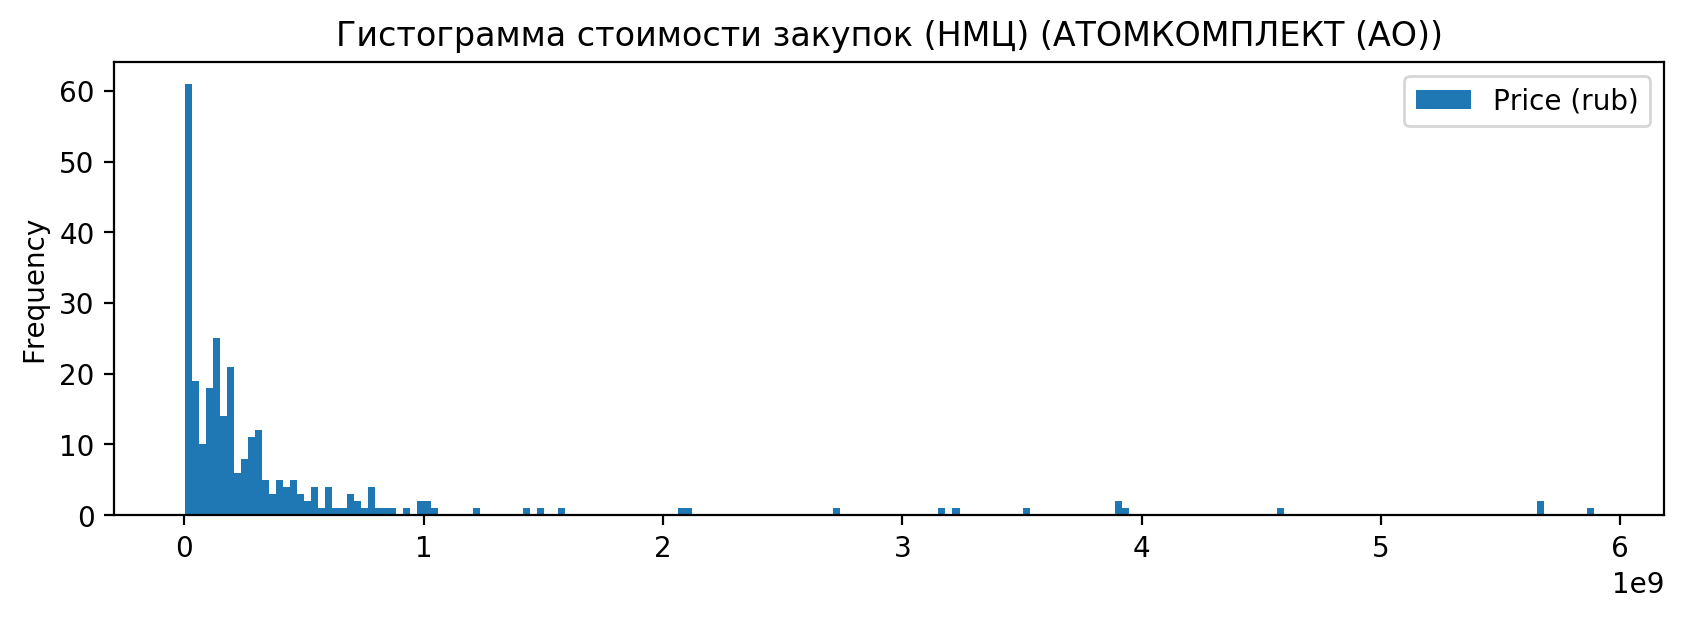

In [14]:
rcParams['figure.figsize'] = 10,3

graf_06 = data.query('Year == 2019 and Organizer == "АТОМКОМПЛЕКТ (АО)"')

graf_06 = graf_06['Price (rub)'].reset_index()
graf_06 = graf_06.drop(['index'], axis=1)

graf_06.plot.hist(bins=200)

plt.title('Гистограмма стоимости закупок (НМЦ) (АТОМКОМПЛЕКТ (АО))')

plt.show()